# 패키지 호출

In [1]:
# EDA 사전 세팅
%matplotlib inline

import time
import os
os.environ['KMP_WARNINGS'] = 'off'
from functools import reduce
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.
import seaborn as sns  #데이터 시각화 
sns.set(font="AppleGothic",
        rc={"axes.unicode_minus": False},
        style='darkgrid')

# 데이터 호출

In [14]:
출상내 = pd.read_csv('교내통계경진대회_데이터셋 - 2022년 출근 (상선,내선).csv')
출하외 = pd.read_csv('교내통계경진대회_데이터셋 - 2022년 출근 (하선,외선).csv')
퇴상내 = pd.read_csv('교내통계경진대회_데이터셋 - 2022년 퇴근 (상선,내선).csv')
퇴하외 = pd.read_csv('교내통계경진대회_데이터셋 - 2022년 퇴근 (하선,외선).csv')
출상내1 = 출상내[출상내['호선명'].isin([2, 5, 6, 7])].reset_index(drop=True)
출하외1 = 출하외[출하외['호선명'].isin([2, 3, 4, 7])].reset_index(drop=True)
퇴상내1 = 퇴상내[퇴상내['호선명'].isin([2, 3, 4, 7])].reset_index(drop=True)
퇴하외1 = 퇴하외[퇴하외['호선명'].isin([2, 5, 6, 7])].reset_index(drop=True)
출상내1 = 출상내1.drop(['호선명', '지하철역', '위도', '경도', '상세주소'], axis = 1)
출하외1 = 출하외1.drop(['호선명', '지하철역', '위도', '경도', '상세주소'], axis = 1)
퇴상내1 = 퇴상내1.drop(['호선명', '지하철역', '위도', '경도', '상세주소'], axis = 1)
퇴하외1 = 퇴하외1.drop(['호선명', '지하철역', '위도', '경도', '상세주소'], axis = 1)

하선 외선 출근 노선: 2,3,4,7 <br>
하선 외선 퇴근 노선:2,5,6,7 <br>
상선 내선 출근 노선:2,5,6,7 <br>
상선 내선 퇴근 노선:2,3,4,7 <br>

# 출근 하선 외선

In [4]:
selected_columns = ['안전시설지수(승강장연결,스크린도어,안전발판)', 
                         '열차내 사고',
                         '역구내 사고', 
                         '출입문관련', 
                         '승강설비관련', 
                         '발빠짐',
                         '기타',
                         '총사고발생수',
                         '반경 내 학교 수',
                         '반경 내 주요공원 수', 
                         '반경 내 대학 수',
                         '반경 아파트 수',
                         '반경 내 대학교 수',
                         '공공 자전거 시설 수',
                       '총층수']
출하외1 = 출하외1.drop(columns=selected_columns);

# '승차인원' 변수 생성
출하외1['승차인원'] = 출하외1['승차인원_0708'] + 출하외1['승차인원_0809'] + 출하외1['승차인원_0910']

# '하차인원' 변수 생성
출하외1['하차인원'] = 출하외1['하차인원_0708'] + 출하외1['하차인원_0809'] + 출하외1['하차인원_0910']

# 필요한 변수들 제거
variables_to_drop = ['승차인원_0708', '승차인원_0809', '승차인원_0910', '하차인원_0708', '하차인원_0809', '하차인원_0910',
                    '출근출발_EE', '출근출발_EH', '출근출발_EW', '출근도착_EE', '출근도착_EH', '출근도착_EW']
출하외1.drop(columns=variables_to_drop, inplace=True)

# 결과 확인
출하외1

,출근_하외선_배차간격,환승유입인원수,"출근시간 혼잡도 평균(하선,외선)",출근출발_HE,출근출발_HH,출근출발_HW,출근출발_WE,출근출발_WH,출근출발_WW,출근도착_HE,출근도착_HH,출근도착_HW,출근도착_WE,출근도착_WH,출근도착_WW,승차인원,하차인원
0,4.253968,831737,86.085714,24991,2311,88696,5548,4832,7179,56430,3076,325838,5635,1869,7809,145745,732361
1,4.336134,315530,31.185714,31376,2316,122460,3358,1803,3298,26163,2205,88296,2151,2753,2462,258389,106221
2,4.387500,374321,45.100000,29428,2599,130241,1890,3677,2820,52120,2705,98437,3539,2361,2936,197069,133621
3,4.239837,367316,103.685714,29890,2654,95422,4083,3046,5008,38890,2009,186677,4045,1936,4732,87221,333984
4,4.296748,731249,55.957143,24096,1788,95008,3212,2718,2629,42617,2646,416612,3425,1962,5980,408161,450322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,4.942029,147598,20.957143,41350,1118,177399,3477,1681,3573,18426,1316,45777,1778,3482,1527,136440,30897
140,4.631579,244815,87.371429,14222,1325,44536,4729,4209,5446,81903,1431,417692,7768,1178,8045,36169,296046
141,4.592105,95405,68.942857,42997,2288,153883,3391,2755,3132,36556,2178,72852,2861,4220,2697,64270,38634
142,4.592105,246439,65.414286,18891,1304,67804,828,766,1110,7177,906,13528,552,1456,572,172250,58814


## scailing 

변수 스케일 전 데이터 분포 확인

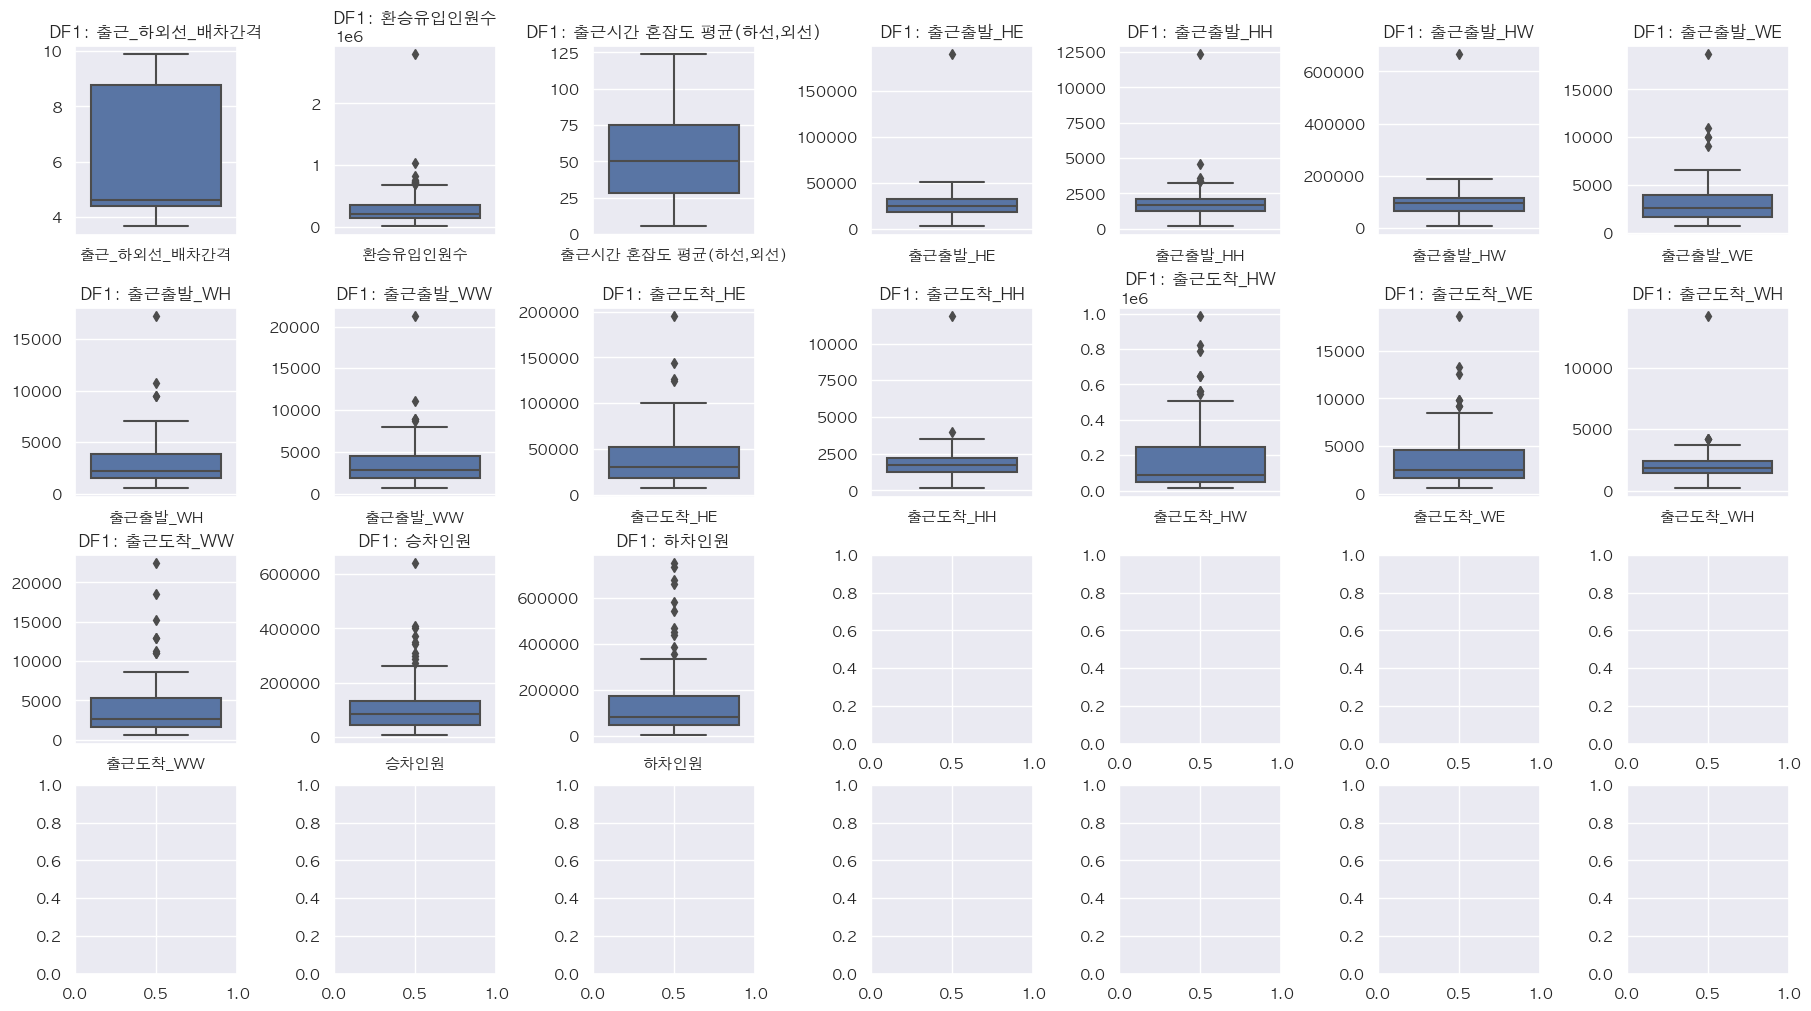

In [5]:

# 그래프를 그릴 캔버스 생성 (2개)
fig, axes = plt.subplots(nrows=4, ncols=7, figsize=(18, 10), constrained_layout=True)
axes = axes.flatten()

# 각 변수에 대한 Boxplot 그리기 (첫 번째 데이터프레임)
for i, variable in enumerate(출하외1.columns):
    sns.boxplot(x='variable', y='value', data=pd.melt(출하외1[[variable]]), ax=axes[i])
    axes[i].set_title(f'DF1: {variable}')
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)

# 그래프 보여주기
plt.show()

대부분의 연속형 변수에서 이상치가 확인이 됨 종속변수인 혼잡도만 적당한 정규분포를 이루는 것을 볼 수 있음 <br>
표준화를 위해서는 원래 이상치를 적절히 제거해주어야 하나 나는 레코드가 곧 하나의 지하철 역이므로 데이터를 지우는 것은 옳지 않다고 판단 <br>
때문에 이상치의 영향을 최소로 받는 RobustScaler을 이용하여 정규화

In [6]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
# 스케일링할 변수들 선택
selected_columns = 출하외1.columns.difference(['출근시간 혼잡도 평균(하선,외선)'])
# RobustScaler 초기화
scaler = StandardScaler()

# 선택한 변수들에 대해 스케일링 수행
scaled_data = scaler.fit_transform(출하외1[selected_columns])
# 스케일링된 결과를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=[f"{var}_scaled" for var in selected_columns])


merged_df = pd.concat([출하외1, scaled_df], axis=1);
merged_df = merged_df.drop(selected_columns, axis=1)
merged_df

,"출근시간 혼잡도 평균(하선,외선)",승차인원_scaled,출근_하외선_배차간격_scaled,출근도착_HE_scaled,출근도착_HH_scaled,출근도착_HW_scaled,출근도착_WE_scaled,출근도착_WH_scaled,출근도착_WW_scaled,출근출발_HE_scaled,출근출발_HH_scaled,출근출발_HW_scaled,출근출발_WE_scaled,출근출발_WH_scaled,출근출발_WW_scaled,하차인원_scaled,환승유입인원수_scaled
0,86.085714,0.386511,-0.731107,0.655737,1.152363,0.918807,0.797465,-0.131084,1.139442,-0.070628,0.441686,-0.097406,1.034617,0.930497,1.537785,4.052798,1.881695
1,31.185714,1.565984,-0.690853,-0.403327,0.345708,-0.432456,-0.485126,0.541270,-0.421995,0.299846,0.446191,0.440931,0.083503,-0.493680,-0.076599,-0.208514,0.081800
2,45.100000,0.923915,-0.665688,0.504927,0.808771,-0.374769,0.025849,0.243122,-0.283577,0.186818,0.701174,0.564992,-0.554048,0.387438,-0.275434,-0.022038,0.286791
3,103.685714,-0.226281,-0.738030,0.042000,0.164188,0.127186,0.212126,-0.080125,0.240893,0.213624,0.750730,0.009835,0.398370,0.090755,0.634711,1.341569,0.262366
4,55.957143,3.134216,-0.710149,0.172410,0.754129,1.435176,-0.016119,-0.060350,0.605336,-0.122559,-0.029539,0.003234,0.020095,-0.063465,-0.354884,2.133329,1.531317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,20.957143,0.289081,-0.394018,-0.674050,-0.477617,-0.674326,-0.622441,1.095735,-0.695035,0.878562,-0.633211,1.316885,0.135185,-0.551042,0.037793,-0.721145,-0.503740
140,87.371429,-0.760837,-0.546111,1.547056,-0.371112,1.441320,1.582702,-0.656646,1.208359,-0.695473,-0.446704,-0.801497,0.678927,0.637574,0.816907,1.083375,-0.164767
141,68.942857,-0.466597,-0.565450,-0.039669,0.320703,-0.520310,-0.223748,1.657044,-0.353370,0.974125,0.420962,0.941943,0.097835,-0.046068,-0.145651,-0.668490,-0.685725
142,65.414286,0.664040,-0.565450,-1.067661,-0.857328,-0.857775,-1.073778,-0.445205,-0.973915,-0.424566,-0.465625,-0.430510,-1.015273,-0.981257,-0.986744,-0.531151,-0.159104


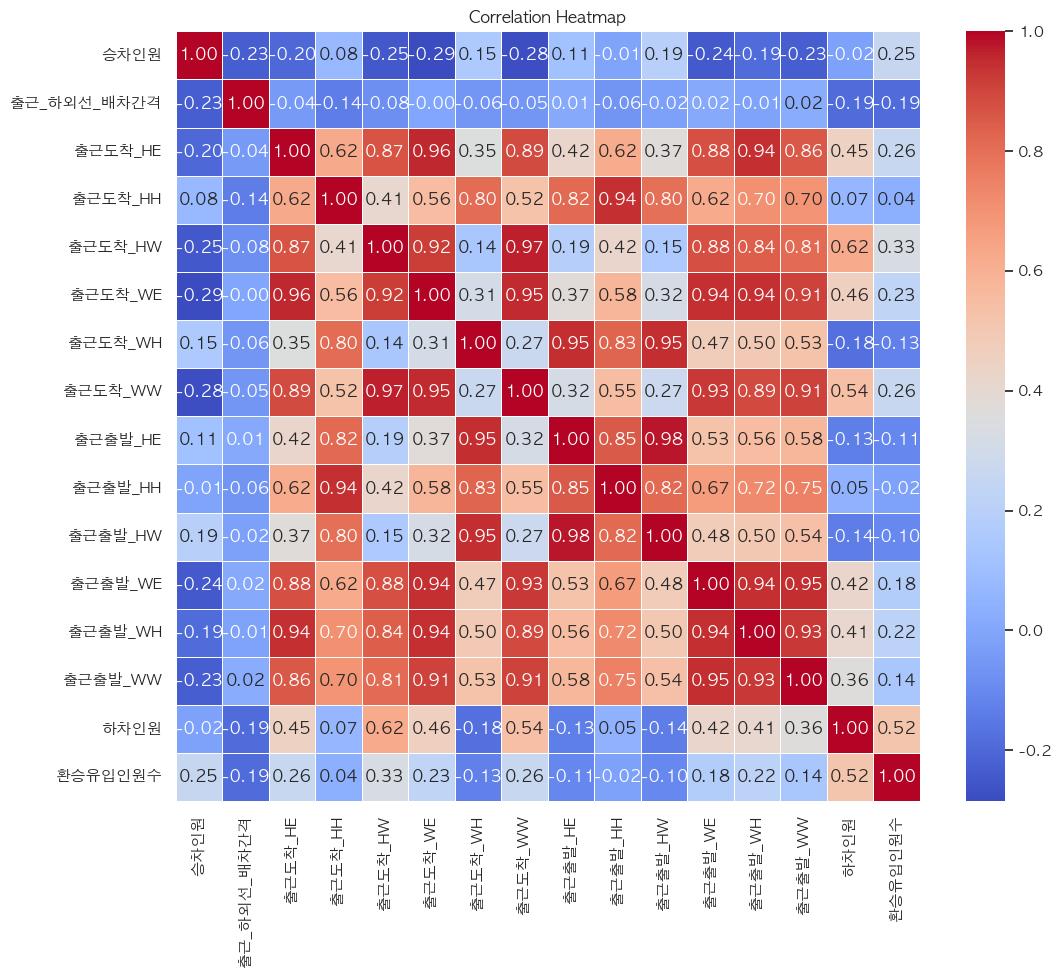

In [7]:
# 히트맵 데이터 추출
heatmap_data = 출하외1[selected_columns]

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# 데이터 분할
target = merged_df['출근시간 혼잡도 평균(하선,외선)']
data = merged_df.drop('출근시간 혼잡도 평균(하선,외선)', axis=1)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(data)
출하외pca = pca.transform(data)
print(출하외pca.shape)

(144, 3)


In [10]:
print(pca.explained_variance_ratio_)

[0.54160569 0.20731188 0.10099234]


In [11]:
# 주성분 벡터 출력
components_df = pd.DataFrame(pca.components_, columns=data.columns)
print("주성분 벡터:")
components_df

주성분 벡터:


,승차인원_scaled,출근_하외선_배차간격_scaled,출근도착_HE_scaled,출근도착_HH_scaled,출근도착_HW_scaled,출근도착_WE_scaled,출근도착_WH_scaled,출근도착_WW_scaled,출근출발_HE_scaled,출근출발_HH_scaled,출근출발_HW_scaled,출근출발_WE_scaled,출근출발_WH_scaled,출근출발_WW_scaled,하차인원_scaled,환승유입인원수_scaled
0,-0.049557,-0.018382,0.307448,0.274990,0.275969,0.309249,0.215603,0.301519,0.233189,0.283303,0.219141,0.321451,0.327091,0.324078,0.126418,0.062302
1,0.177075,0.016605,-0.150185,0.243114,-0.289715,-0.190498,0.397906,-0.222247,0.376922,0.246771,0.392876,-0.103065,-0.079712,-0.051223,-0.355352,-0.235730
2,0.589489,-0.506822,-0.019411,0.101960,0.002565,-0.087179,0.052149,-0.046798,0.021005,0.017085,0.069697,-0.083096,-0.035234,-0.090278,0.296733,0.512257


In [12]:
# 주성분의 고유값 출력
explained_variance_df = pd.DataFrame(pca.explained_variance_, columns=['Explained Variance'])
print("\n주성분의 고유값:")
explained_variance_df


주성분의 고유값:


,Explained Variance
0,8.726290
1,3.340186
2,1.627177


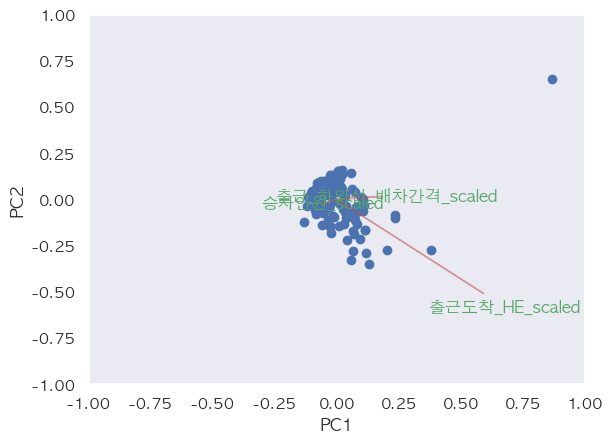

In [13]:
def biplot(score,coeff,pcax,pcay,labels=None):
  pca1=pcax-1
  pca2=pcay-1
  xs = score[:,pca1]
  ys = score[:,pca2]
  n=score.shape[1]
  scalex = 1.0/(xs.max()- xs.min())
  scaley = 1.0/(ys.max()- ys.min())
  plt.scatter(xs*scalex,ys*scaley)
  for i in range(n):
    plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
    if labels is None:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
    else:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(pcax))
  plt.ylabel("PC{}".format(pcay))
  plt.grid()
biplot(출하외pca, pca.components_, 1, 2, labels=components_df.columns)